## Accuracy

In [64]:
import sklearn
import numpy as np
from sklearn.base import BaseEstimator
print(sklearn.__version__)

1.0.2


## 임의 class, method 생성

In [65]:
class MyDummyClassifier(BaseEstimator): # ---- BaseEstimator를 선조로 하는 클래스 생성
    
    def fit(self, X, y=None): # ---- 메소드는 학습하지 않는다
        pass
    
    def predict(self, X):
        print('X',X)
        print('X.shape[0]',X.shape[0])
        pred = np.zeros((X.shape[0]))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: # ---- 남자면
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [67]:
# Null값 처리 method
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df    

In [68]:
# feature 삭제 method
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

In [69]:
# Label Encoding method 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [70]:
# 앞에서 설정한 Data Preprocessing method 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [72]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0) # 20%를 테스트데이터로

In [73]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### (남자는 무조건 사망처리, 여자는 무조건 생존처리 하니까 정확도 78.77% 나온것)

In [74]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('MyDummyClassifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

X      Pclass  Sex        Age  SibSp  Parch      Fare  Cabin  Embarked
495       3    1  29.699118      0      0   14.4583      7         0
648       3    1  29.699118      0      0    7.5500      7         3
278       3    1   7.000000      4      1   29.1250      7         2
31        1    0  29.699118      1      0  146.5208      1         0
255       3    0  29.000000      0      2   15.2458      7         0
..      ...  ...        ...    ...    ...       ...    ...       ...
780       3    0  13.000000      0      0    7.2292      7         0
837       3    1  29.699118      0      0    8.0500      7         3
215       1    0  31.000000      1      0  113.2750      3         0
833       3    1  23.000000      0      0    7.8542      7         3
372       3    1  19.000000      0      0    8.0500      7         3

[179 rows x 8 columns]
X.shape[0] 179
MyDummyClassifier의 정확도는: 0.7877


<hr>

## 임의 class, method 생성2

In [75]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [76]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [77]:
print(digits.data)
print(digits.data.shape, digits.data.dtype)
print(digits.target)
print(digits.target.shape, digits.target.dtype)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64) float64
[0 1 2 ... 8 9 8]
(1797,) int32


In [78]:
digits.target == 7 # digits.target array중에서 7만 True인 array

array([False, False, False, ..., False, False, False])

In [79]:
y = (digits.target == 7).astype(int)

In [80]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [82]:
print(X_train, X_test, y_train, y_test)

[[ 0.  0.  3. ... 12. 14.  7.]
 [ 0.  1.  9. ... 10.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ... 16. 13.  1.]
 [ 0.  1. 11. ... 13. 16.  5.]
 [ 0.  0.  6. ...  6.  0.  0.]] [[ 0.  0.  7. ...  3.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]
 ...
 [ 0.  1. 13. ... 15.  3.  0.]
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... 12.  0.  0.]] [0 0 1 ... 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 

In [83]:
print('레이블 테스트 세트 크기 :', y_test.shape)

레이블 테스트 세트 크기 : (450,)


In [84]:
print(pd.Series(y_test).value_counts())

0    405
1     45
dtype: int64


In [85]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test , fakepred)))

모든 예측을 0으로 하여도 정확도는: 0.900


## Confusion Matrix
* = 오차행렬
* 정밀도(Precision) = TP/(FP+TP)
* 재현율(Recall) = TP/(FN+TP)

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score , recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
import pandas as pd
import numpy as np

In [87]:
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [88]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

정밀도 = TP / ( FP + TP )
정밀도는 내가 Positive로 예측한 값 중에 실제 값이 Positive인 비율이다.
아주 확실한 경우에만 positive로 예측할 수록 정밀도는 높아진다.
스팸메일과 같이 Negative인 데이터 ( 정상 메일 ) 을 Positive (스팸메일) 로 예측하면 치명적인 경우 중요한 지표이다.

재현률 = TP / ( FN + TP )
재현률은 실제 값이 Positive인 대상 중에 내가 Positive로 예측한 비율이다.
positive로 예측을 많이할수록 재현률은 높아진다.
암 진단, 금융사기 예측과 같이 Positive인 경우 ( 양성, 사기)를 Negative (음성, 정상) 인 경우로 잘못 예측하면 치명적인 경우 중요한 지표이다.

In [89]:
titanic_df = pd.read_csv('titanic/train.csv')

In [90]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

In [92]:
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [93]:
lr_clf

LogisticRegression(solver='liblinear')

In [94]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
...,...,...,...,...,...,...,...,...
638,3,0,41.000000,0,5,39.6875,7,3
771,3,1,48.000000,0,0,7.8542,7,3
521,3,1,22.000000,0,0,7.8958,7,3
711,1,1,29.699118,0,0,26.5500,2,3


**predict_proba( ) 메소드 확인**

In [95]:
pred = lr_clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [96]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba

array([[0.44935228, 0.55064772],
       [0.86335513, 0.13664487],
       [0.86429645, 0.13570355],
       [0.84968519, 0.15031481],
       [0.82343411, 0.17656589],
       [0.84231224, 0.15768776],
       [0.87095491, 0.12904509],
       [0.27228604, 0.72771396],
       [0.78185129, 0.21814871],
       [0.33185992, 0.66814008],
       [0.86178764, 0.13821236],
       [0.870581  , 0.129419  ],
       [0.86425952, 0.13574048],
       [0.87065946, 0.12934054],
       [0.56033547, 0.43966453],
       [0.85003024, 0.14996976],
       [0.88954174, 0.11045826],
       [0.74250732, 0.25749268],
       [0.71120225, 0.28879775],
       [0.23776272, 0.76223728],
       [0.75684106, 0.24315894],
       [0.62428169, 0.37571831],
       [0.84655248, 0.15344752],
       [0.82711259, 0.17288741],
       [0.8682563 , 0.1317437 ],
       [0.77003828, 0.22996172],
       [0.82946349, 0.17053651],
       [0.9033613 , 0.0966387 ],
       [0.73372048, 0.26627952],
       [0.68847388, 0.31152612],
       [0.

#### 왼쪽 = neg 오른쪽 = pos 확률

In [97]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]


In [98]:
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [99]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]
binarizer = Binarizer(threshold=1.1) # ---- threshold보다 작거나 같으면 0, 크면 1 반환
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [100]:
custom_threshold = 0.5

In [101]:
pred_proba[:] # ----- 다차원 전체 행

array([[0.44935228, 0.55064772],
       [0.86335513, 0.13664487],
       [0.86429645, 0.13570355],
       [0.84968519, 0.15031481],
       [0.82343411, 0.17656589],
       [0.84231224, 0.15768776],
       [0.87095491, 0.12904509],
       [0.27228604, 0.72771396],
       [0.78185129, 0.21814871],
       [0.33185992, 0.66814008],
       [0.86178764, 0.13821236],
       [0.870581  , 0.129419  ],
       [0.86425952, 0.13574048],
       [0.87065946, 0.12934054],
       [0.56033547, 0.43966453],
       [0.85003024, 0.14996976],
       [0.88954174, 0.11045826],
       [0.74250732, 0.25749268],
       [0.71120225, 0.28879775],
       [0.23776272, 0.76223728],
       [0.75684106, 0.24315894],
       [0.62428169, 0.37571831],
       [0.84655248, 0.15344752],
       [0.82711259, 0.17288741],
       [0.8682563 , 0.1317437 ],
       [0.77003828, 0.22996172],
       [0.82946349, 0.17053651],
       [0.9033613 , 0.0966387 ],
       [0.73372048, 0.26627952],
       [0.68847388, 0.31152612],
       [0.

In [102]:
pred_proba[:,1] # ----- 다차원 1열로

array([0.55064772, 0.13664487, 0.13570355, 0.15031481, 0.17656589,
       0.15768776, 0.12904509, 0.72771396, 0.21814871, 0.66814008,
       0.13821236, 0.129419  , 0.13574048, 0.12934054, 0.43966453,
       0.14996976, 0.11045826, 0.25749268, 0.28879775, 0.76223728,
       0.24315894, 0.37571831, 0.15344752, 0.17288741, 0.1317437 ,
       0.22996172, 0.17053651, 0.0966387 , 0.26627952, 0.31152612,
       0.92353131, 0.7746788 , 0.12838058, 0.75924585, 0.37288265,
       0.22996172, 0.09445724, 0.59397424, 0.06956413, 0.12349478,
       0.30202577, 0.10335406, 0.78006622, 0.68434291, 0.62057771,
       0.62067108, 0.92838721, 0.44222434, 0.92085513, 0.13196916,
       0.49209939, 0.12934054, 0.14423593, 0.6512987 , 0.28441583,
       0.21146799, 0.2538079 , 0.13570998, 0.15920995, 0.40161938,
       0.26467919, 0.11294402, 0.45447198, 0.4467366 , 0.37416472,
       0.11636721, 0.64818744, 0.60096648, 0.91699188, 0.14927475,
       0.13221179, 0.16929074, 0.12350956, 0.94040086, 0.21264

In [108]:
pred_proba[:,1].reshape(-1,1)

array([[0.55064772],
       [0.13664487],
       [0.13570355],
       [0.15031481],
       [0.17656589],
       [0.15768776],
       [0.12904509],
       [0.72771396],
       [0.21814871],
       [0.66814008],
       [0.13821236],
       [0.129419  ],
       [0.13574048],
       [0.12934054],
       [0.43966453],
       [0.14996976],
       [0.11045826],
       [0.25749268],
       [0.28879775],
       [0.76223728],
       [0.24315894],
       [0.37571831],
       [0.15344752],
       [0.17288741],
       [0.1317437 ],
       [0.22996172],
       [0.17053651],
       [0.0966387 ],
       [0.26627952],
       [0.31152612],
       [0.92353131],
       [0.7746788 ],
       [0.12838058],
       [0.75924585],
       [0.37288265],
       [0.22996172],
       [0.09445724],
       [0.59397424],
       [0.06956413],
       [0.12349478],
       [0.30202577],
       [0.10335406],
       [0.78006622],
       [0.68434291],
       [0.62057771],
       [0.62067108],
       [0.92838721],
       [0.442

In [109]:
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

In [112]:
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)

In [113]:
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [114]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [116]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )        

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


<hr>

* precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

In [117]:
from sklearn.metrics import precision_recall_curve

In [118]:
lr_clf

LogisticRegression(solver='liblinear')

In [119]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
...,...,...,...,...,...,...,...,...
638,3,0,41.000000,0,5,39.6875,7,3
771,3,1,48.000000,0,0,7.8542,7,3
521,3,1,22.000000,0,0,7.8958,7,3
711,1,1,29.699118,0,0,26.5500,2,3


In [124]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

In [125]:
pred_proba_class1

array([0.55064772, 0.13664487, 0.13570355, 0.15031481, 0.17656589,
       0.15768776, 0.12904509, 0.72771396, 0.21814871, 0.66814008,
       0.13821236, 0.129419  , 0.13574048, 0.12934054, 0.43966453,
       0.14996976, 0.11045826, 0.25749268, 0.28879775, 0.76223728,
       0.24315894, 0.37571831, 0.15344752, 0.17288741, 0.1317437 ,
       0.22996172, 0.17053651, 0.0966387 , 0.26627952, 0.31152612,
       0.92353131, 0.7746788 , 0.12838058, 0.75924585, 0.37288265,
       0.22996172, 0.09445724, 0.59397424, 0.06956413, 0.12349478,
       0.30202577, 0.10335406, 0.78006622, 0.68434291, 0.62057771,
       0.62067108, 0.92838721, 0.44222434, 0.92085513, 0.13196916,
       0.49209939, 0.12934054, 0.14423593, 0.6512987 , 0.28441583,
       0.21146799, 0.2538079 , 0.13570998, 0.15920995, 0.40161938,
       0.26467919, 0.11294402, 0.45447198, 0.4467366 , 0.37416472,
       0.11636721, 0.64818744, 0.60096648, 0.91699188, 0.14927475,
       0.13221179, 0.16929074, 0.12350956, 0.94040086, 0.21264

In [128]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)


In [127]:
print('thresholds 5 sample:', thresholds[:5])
print('precisions 5 sample:', precisions[:5])
print('recalls 5 sample:', recalls[:5])

thresholds 5 sample: [0.11573101 0.11636721 0.11819211 0.12102773 0.12349478]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]


In [130]:
thresholds.shape[0]

147

In [131]:
thr_index = np.arange(0, thresholds.shape[0], 15)

In [132]:
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]


In [133]:
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


### Threshold 변화에 따른 Recall의 변화

In [134]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

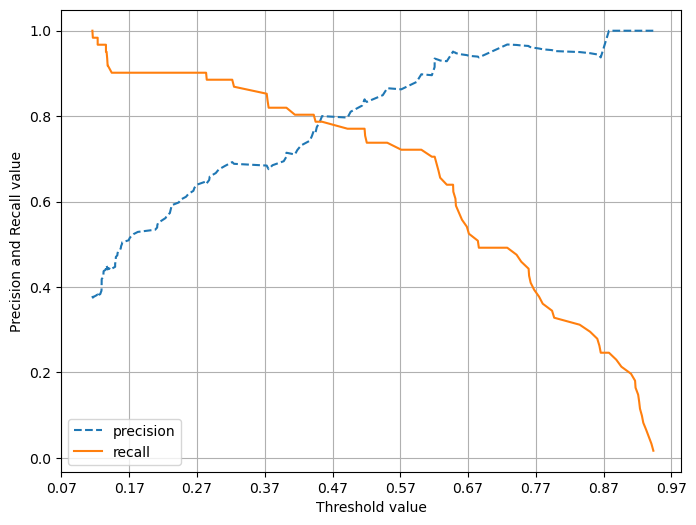

In [135]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )